Universidad del Valle de Guatemala
- Marcos Gutierrez  17909
- David Valenzuela  171001
- Fernando Hengstenberg 17699
- Raúl Monzon 17014
---
# <center> LABORATORIO No. 3 <br> Reconocimiento de Imagenes 
### INVESTIGACIÓN PREVIA
La retinopatía diabética se diagnostica mejor mediante un examen ocular con la pupila dilatada. Para este examen, las gotas que se colocan en los ojos dilatan (abren más) las pupilas para permitirle al médico ver mejor dentro de los ojos. Las gotas pueden hacer que la visión cercana se torne borrosa hasta que su efecto desaparezca, varias horas después.

Si la enfermedad progresa, algunos vasos sanguíneos se cierran, lo que causa la formación, o proliferación, de nuevos vasos sanguíneos en la superficie de la retina. Esta etapa se conoce como la retinopatía diabética proliferativa. Estos vasos sanguíneos anormales pueden causar problemas graves de la vista.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/Data Science/Lab No. 3

/content/drive/My Drive/Data Science/Lab No. 3


In [4]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [6]:
df_train['diagnosis'].unique() #Se obtienen los tipos de niveles que existen

array([2, 4, 1, 0, 3])

In [7]:
df_train['id_code'].unique() #Se obtiene el id de cada imagen que se procesara

array(['000c1434d8d7', '001639a390f0', '0024cdab0c1e', ...,
       'ffcf7b45f213', 'ffd97f8cd5aa', 'ffec9a18a3ce'], dtype=object)

### VISUALIZACIÓN DE LOS DATOS

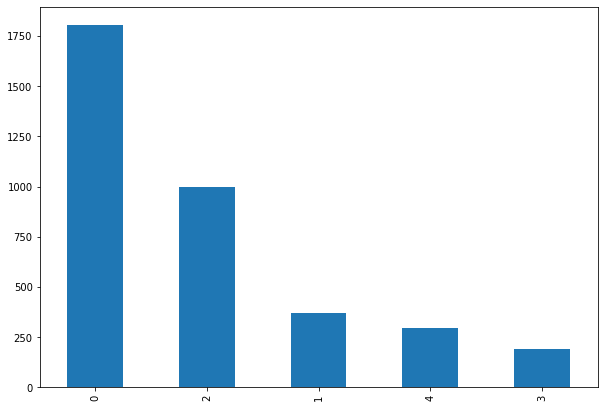

In [8]:
diagnostic_graph = df_train['diagnosis'].value_counts().plot(kind='bar', figsize = (10, 7))

En el eje X se observa los niveles de cada uno de los diagnisticos, y en el eje Y se observa las cantidades de diagnosticos. Los niveles que existen son los siguientes: 
* 0 = NO DR
* 1 = MILD DR
* 2 = MODERATE DR
* 3 = SEVERE DR
* 4 = PROLIFERATIVE DR

In [9]:
os.listdir()

['test.csv',
 'train.csv',
 'test_images',
 'train_images',
 'Reconocimiento_Imagenes.ipynb',
 'Lab03.ipynb']

In [10]:
df_train['path'] = df_train['id_code'].map(lambda x: os.path.join('./train_images/','{}.png'.format(x)))
df_train = df_train.drop(columns=['id_code'])
df_train.head(10)

,diagnosis,path
0,2,./train_images/000c1434d8d7.png
1,4,./train_images/001639a390f0.png
2,1,./train_images/0024cdab0c1e.png
3,0,./train_images/002c21358ce6.png
4,0,./train_images/005b95c28852.png
5,4,./train_images/0083ee8054ee.png
6,0,./train_images/0097f532ac9f.png
7,2,./train_images/00a8624548a9.png
8,2,./train_images/00b74780d31d.png
9,1,./train_images/00cb6555d108.png


In [11]:
len(df_train)
print('Se encuentran:', len(df_train), 'imagenes disponibles')

Se encuentran: 3662 imagenes disponibles


**No-DR**

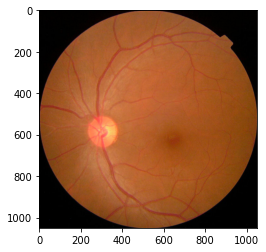

In [12]:
no_zero = Image.open(df_train[df_train['diagnosis']==0].iloc[0]['path'])
plt.imshow(np.asarray(no_zero))

**MILD**

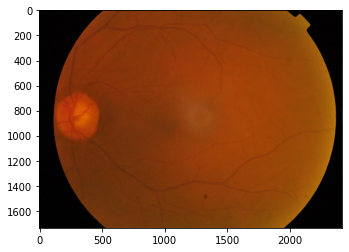

In [13]:
mild_one = Image.open(df_train[df_train['diagnosis']==1].iloc[0]['path'])
plt.imshow(np.asarray(mild_one))

**MODERATE**

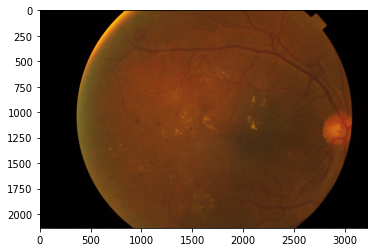

In [14]:
moderate_two = Image.open(df_train[df_train['diagnosis']==2].iloc[0]['path'])
plt.imshow(np.asarray(moderate_two))

**SEVERE**

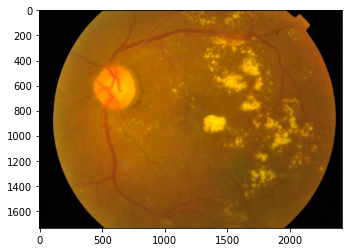

In [15]:
severe_three = Image.open(df_train[df_train['diagnosis']==3].iloc[0]['path'])
plt.imshow(np.asarray(severe_three))

**Proliferative**

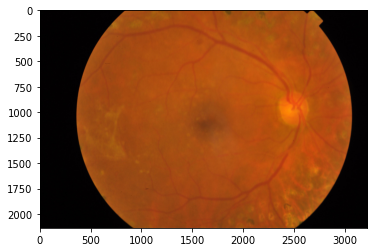

In [16]:
proliferative = Image.open(df_train[df_train['diagnosis']==4].iloc[0]['path'])
plt.imshow(np.asarray(proliferative))

Verificamos los datos que se tiene, más que todo los maximos y minimos

In [17]:
max_size = df_train['diagnosis'].value_counts().max()
min_size = df_train['diagnosis'].value_counts().min()
print('Datos Maximos: ', max_size)
print('Datos Minimos: ', min_size)

Datos Maximos:  1805
Datos Minimos:  193


### REDES NEURONALES

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm